# Analysis of Hypotheses to Increase Revenue

This report is done with the intention of studying a given set of hypotheses to find the most efficient strategy to boost revenue.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prioritizing-Hypotheses" data-toc-modified-id="Prioritizing-Hypotheses-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prioritizing Hypotheses</a></span><ul class="toc-item"><li><span><a href="#ICE" data-toc-modified-id="ICE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ICE</a></span></li><li><span><a href="#RICE" data-toc-modified-id="RICE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RICE</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#A/B-Test-Analysis" data-toc-modified-id="A/B-Test-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>A/B Test Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-Import-&amp;-Preprocessing" data-toc-modified-id="Data-Import-&amp;-Preprocessing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Import &amp; Preprocessing</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Cumulative-Data" data-toc-modified-id="Cumulative-Data-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Cumulative Data</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#A/B-Testing" data-toc-modified-id="A/B-Testing-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>A/B Testing</a></span></li></ul></li></ul></li></ul></div>

## Prioritizing Hypotheses

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-2-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [3]:
hypotheses = pd.read_csv(r'D:/Practicum100/Datasets/hypotheses_us.csv', sep=';')
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [4]:
hypotheses.columns= hypotheses.columns.str.lower()

### ICE

In [5]:
hypotheses['ICE'] =(hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


Text(0.5, 1.0, 'ICE Hypotheses rating')

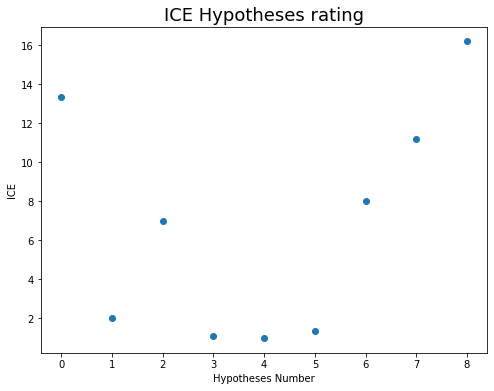

In [6]:
hypotheses = hypotheses.reset_index()

x = hypotheses['index'].values
y = hypotheses['ICE'].values


fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y)

ax.set_xlabel('Hypotheses Number', fontsize=10)
ax.set_ylabel('ICE', fontsize=10)
ax.set_title('ICE Hypotheses rating', fontsize=18)

Based on the ICE Framework, the most promising hypotheses are 8,0 and 7.

The least promising ones are 1, 3, 4 and 5.

Let's do the RICE method to back up these results:

### RICE

In [7]:
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Based on the RICE framework:
* Most promising hypotheses: 7, followed by 2 (with half its score), 0 and 6.
* Least promising hypotheses: 4,5,1 and 3.

Text(0.5, 1.0, 'RICE Hypotheses rating')

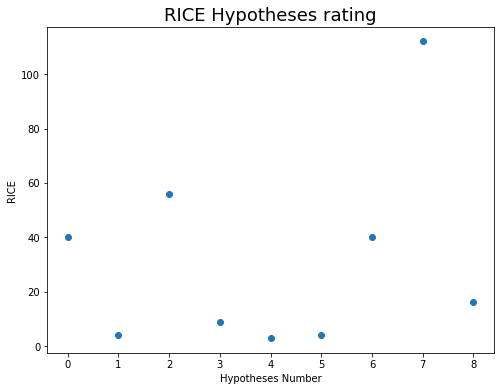

In [8]:
hypotheses = hypotheses.reset_index()

x = hypotheses['index'].values
y = hypotheses['RICE'].values


fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x, y)

ax.set_xlabel('Hypotheses Number', fontsize=10)
ax.set_ylabel('RICE', fontsize=10)
ax.set_title('RICE Hypotheses rating', fontsize=18)

### Conclusion

The difference between ICE and RICE is that RICE takes into account the Reach parameter, unlike ICE. R stands for "Reach", and this gives weight not only to how important hypotheses are, but also how many users it will affect.

* Hypotheses 7 stands as within the top 3 most promising one in both ICE and RICE approaches. The reach of 7 is very high (10) compared to the other hypotheses, so more users will be affected by this change. 
* Hypotheses 0 also stands in the top 3 most promising ones in both approaches. Its reach is quite low (3), but the impact (10) is what makes it stand out. Maybe the users affected won't be as many, but those who are will be strongly influenced by this change. 
* Hypotheses 2 has also a considerable result, but not as high as the previously mentioned. Given its low effort, and a high reach, the RICE method considers it more promising than ICE. This hypotheses seems to be an "easy" and "low cost" approach (low effort) but receives a high rate of confidence. It also reaches a high volume of users (8), but the impact is not expected to be high (3). 

On the other hand, the least promising hypotheses are the same in both methods: 1, 3, 4, 5
* H1 requires a high amount of effort, and it would still not impact or reach a considerable amount of users. 
* H3 has a quite high effort and reach rate, but the impact and confidence is what pulls its ICE nad RICE values down - not great results seem to be expected from this Hypothesis.
* H4 and H5 have very low values in all parameters. It seems these hypotheses were dragged from a brainstorm session, where all ideas were considered. 



##  A/B Test Analysis

###  Data Import & Preprocessing

**ORDERS**

In [9]:
orders = pd.read_csv(r'D:/Practicum100/Datasets/orders_us.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orders['group'] = orders['group'].astype(str)

**VISITS**

In [15]:
visits = pd.read_csv(r'D:/Practicum100/Datasets/visits_us.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [17]:
visits["date"] = visits["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visits['group'] = visits['group'].astype(str)

We have 2 datasets;
* orders: with 1197 entries. 
* visits: with 86 entries.
We have adjusted the data format in date, on both df, and group.

**DUPLICATES**

In [19]:
orders.duplicated().sum()

0

In [20]:
visits_duplicates = visits[['date','group']].duplicated().sum()

In [21]:
visits_duplicates

0

In [22]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


No duplicates found in either df.

**GROUP ASSIGNMENTS**

Before we begin, we need to ensure the dataframes we are working with are  ready. We will begin by checking the group assignment - every visitorId should only have 1 group assigned: either A or B.

In [23]:
orders['visitorId'].nunique()

1031

In [24]:
orders['transactionId'].nunique()

1197

In [25]:
orders_groups = orders.groupby('visitorId').agg({'group':pd.Series.nunique})
orders_groups = orders_groups.reset_index() 
orders_groups.sort_values(by='group', ascending=False).head()

,visitorId,group
639,2654030115,2
932,3891541246,2
950,3941795274,2
340,1404934699,2
84,351125977,2


In [26]:
orders_groups['group'].value_counts()

1    973
2    58 
Name: group, dtype: int64

We have 1031 unique users, which altogether placed 1197 orders. However, we found out that out of the 1031 users, 58 have been assigned to both groups A and B (which account for nearly 6% of the orders data).

We could find the first group these users were assigned to, and get rid of the data from the second group they were assigned by accident. However, their behaviour could have strongly been influenced by having seen the scenario of both groups. Therefore, for safest results, we will need to drop those users that have been assigned to 2 groups.

In [27]:
orders_groups = orders_groups[orders_groups['group'] == 1]

In [28]:
orders_groups.describe()

,visitorId,group
count,9.730000e+02,973.0
mean,2.118387e+09,1.0
std,1.221446e+09,0.0
min,5.114589e+06,1.0
25%,1.028756e+09,1.0
50%,2.138109e+09,1.0
75%,3.141508e+09,1.0
max,4.283872e+09,1.0


We now have visitor_groups filtered data with users that have been assigned to only 1 group. Let's merge it to the original **orders** df, keeping only the visitorsId that are in visitors_group.

In [29]:
orders_new = orders_groups.merge(orders, on='visitorId', how='left')

In [30]:
orders_new = orders_new.drop('group_x', axis=1)

In [31]:
orders_new.columns = ['visitorid', 'transactionid', 'date', 'revenue', 'group']
orders_new.head(10)

,visitorid,transactionid,date,revenue,group
0,5114589,900025958,2019-08-16,10.8,B
1,6958315,1887336629,2019-08-04,25.9,B
2,11685486,797272237,2019-08-23,100.4,A
3,39475350,437876380,2019-08-08,65.4,B
4,47206413,3778001764,2019-08-10,15.2,B
5,48147722,965979600,2019-08-22,20.8,B
6,54447517,2765619353,2019-08-08,5.0,A
7,56960363,2952636658,2019-08-09,25.9,B
8,66685450,448493494,2019-08-13,125.9,A
9,71018815,4129423775,2019-08-23,240.2,B


In [32]:
orders_new['visitorid'].nunique()

973

In [33]:
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   visitorid      1016 non-null   int64         
 1   transactionid  1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [34]:
orders_new['group'] = orders_new['group'].astype(str)

Great, we kept the same number of unique visitorId that calculated before, 973.

We now have the filtered data from orders table, in which each entry represents an order from a user assigned to 1 group only. We can now start to calculate metrics and begin the A/B test.

### Analysis

#### Cumulative Data

**Graph cumulative revenue by group. Make conclusions and conjectures**

In [35]:
# Create an array with unique paired date-group values 
datesGroups = orders_new[['date','group']].drop_duplicates()

In [36]:
# Getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders_new[np.logical_and(orders_new['date'] <= x['date'], orders_new['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionid' : pd.Series.nunique,
'visitorid' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [37]:
ordersAggregated.head()

,date,group,transactionid,visitorid,revenue
90,2019-08-01,A,23,19,2266.6
23,2019-08-01,B,17,17,967.2
38,2019-08-02,A,42,36,3734.9
121,2019-08-02,B,40,39,3535.3
21,2019-08-03,A,66,60,5550.1


In [38]:
# Getting aggregated cumulative daily data on visitors
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
    'date':'max',
    'group':'max',
    'visits':'sum'}), axis=1).sort_values(by=['date','group'])

In [39]:
visitorsAggregated.head(10)

,date,group,visits
90,2019-08-01,A,719
23,2019-08-01,B,713
38,2019-08-02,A,1338
121,2019-08-02,B,1294
21,2019-08-03,A,1845
139,2019-08-03,B,1803
12,2019-08-04,A,2562
1,2019-08-04,B,2573
72,2019-08-05,A,3318
15,2019-08-05,B,3280


In [40]:
# Merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [41]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

In [42]:
cumulativeRevenueA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 60
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     31 non-null     datetime64[ns]
 1   revenue  31 non-null     float64       
 2   orders   31 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 992.0 bytes


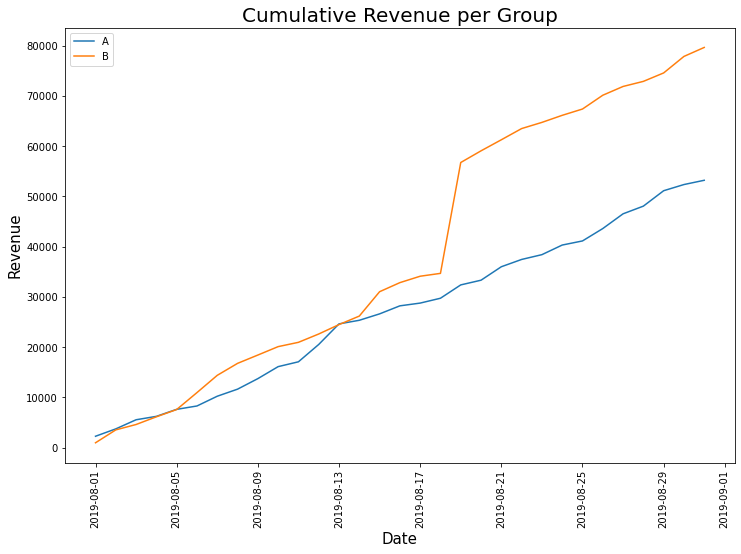

In [43]:
plt.figure(figsize=(12,8));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A');
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B');
plt.legend();
plt.xlabel('Date', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.title('Cumulative Revenue per Group', fontsize=20)
plt.xticks(rotation='vertical');

Both groups began with a steady increase, but group B had a sudden increase between 17 and 21 of August. This could be due to either a sudden increase on number of orders, or purchase size within group B.

**Graph cumulative average order size by group. Make conclusions and conjectures**

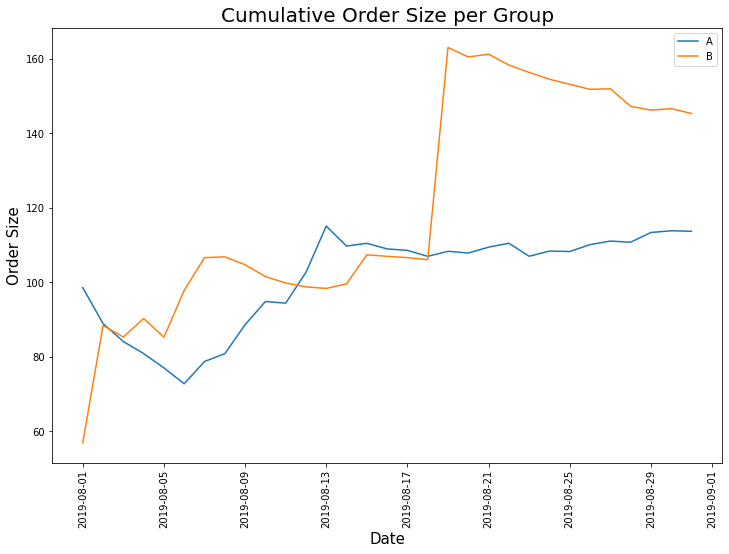

In [44]:
plt.figure(figsize=(12,8));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Order Size', fontsize=15)
plt.title('Cumulative Order Size per Group', fontsize=20)
plt.legend();
plt.xticks(rotation='vertical');

Even though the cumulative value of average purchase size seems to be evolving steadily as of 20 August (aprox), it is still risky to make decisions based on it. We could wait longer and see how it evolves, but before let's find the relative difference in purchase size between A and B.

**Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures**

In [45]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


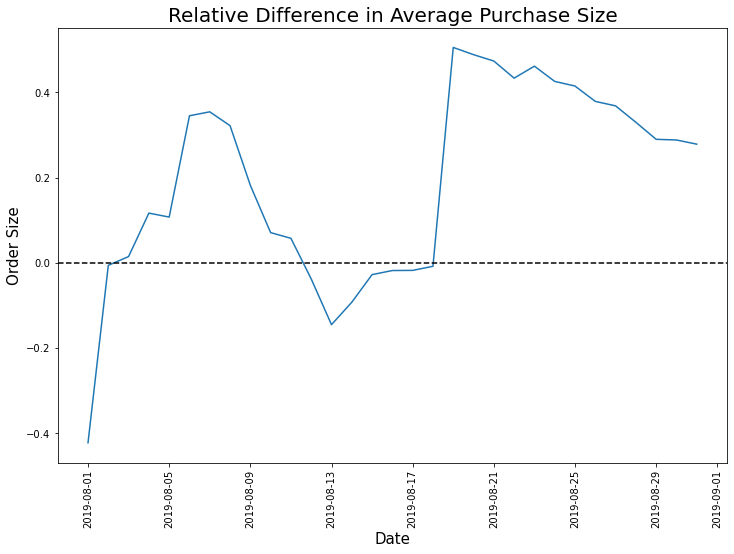

In [46]:
plt.figure(figsize=(12,8));
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation='vertical');
plt.xlabel('Date', fontsize=15)
plt.ylabel('Order Size', fontsize=15)
plt.title('Relative Difference in Average Purchase Size', fontsize=20);

The graph above confirms that there were considerable differences between the average purchase size of group A and B. Group B took the lead in this metric twice:
* between 2 and 12 Aug approximately
* as of 18 or 19 of August


**Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures**

In [47]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [48]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

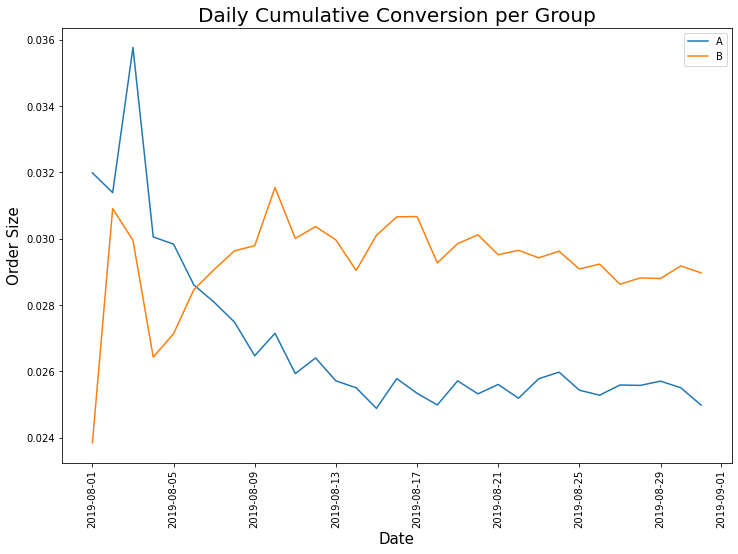

In [49]:
plt.figure(figsize=(12,8));
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation='vertical');
plt.xlabel('Date', fontsize=15)
plt.ylabel('Order Size', fontsize=15)
plt.title('Daily Cumulative Conversion per Group', fontsize=20);

Let's adjust the scale of the y axis to have a more analogous visualization of the conversion rate.

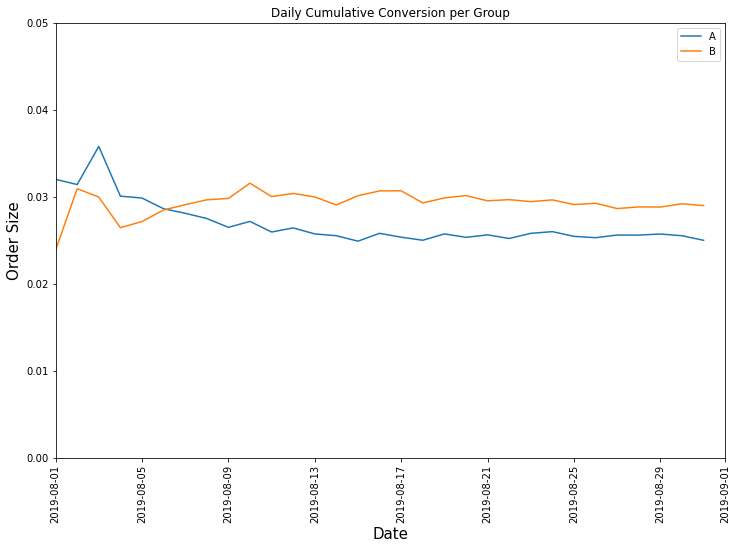

In [50]:
plt.figure(figsize=(12,8));
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation='vertical');
plt.xlabel('Date', fontsize=15)
plt.ylabel('Order Size', fontsize=15)
plt.title('Daily Cumulative Conversion per Group');
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]);

The conversion rate is quite similar between both groups. The fluctuation rate remained between 2% and 4%, not so high.
At the beginning, Group A had a higher conversion rate, but since 4 Aug approximately it decreased very steadily, going below B's conversion rate since 6 August. 
Since we adapted the graph's scale, we can see that the values are settled around their average value.


#### Outliers

**Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

In [51]:
orders_new.head()

,visitorid,transactionid,date,revenue,group
0,5114589,900025958,2019-08-16,10.8,B
1,6958315,1887336629,2019-08-04,25.9,B
2,11685486,797272237,2019-08-23,100.4,A
3,39475350,437876380,2019-08-08,65.4,B
4,47206413,3778001764,2019-08-10,15.2,B


In [52]:
orders_peruser = orders_new.pivot_table(index='visitorid', values='transactionid', aggfunc='count')
orders_peruser['transactionid'].value_counts()

1    937
2    29 
3    7  
Name: transactionid, dtype: int64

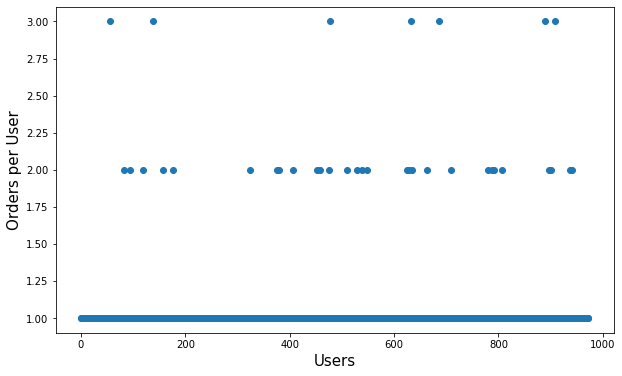

In [53]:
x_values = pd.Series(range(0, len(orders_peruser['transactionid'])));

plt.figure(figsize=(10,6));
plt.scatter(x_values, orders_peruser['transactionid']);
plt.xlabel('Users', fontsize=15);
plt.ylabel('Orders per User', fontsize=15);

The big majority of users have only ordered once, and very few ordered 3 (which is the maximum amount of orders per user).
Let's find the exact point at which data becomes an anomaly.

**Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly**

In [54]:
np.percentile(orders_peruser['transactionid'], [90, 95, 99])

array([1., 1., 2.])

As previously mentioned, the number of orders is either 1, 2 or 3. 
Only 1% of users placed more than 2 orders, therefore we will consider 2 orders as the lower limit for the number of orders and filter anomalies based on that. 

Let's see how revenue looks:

**Plot a scatter chart of order prices. Make conclusions and conjectures.**

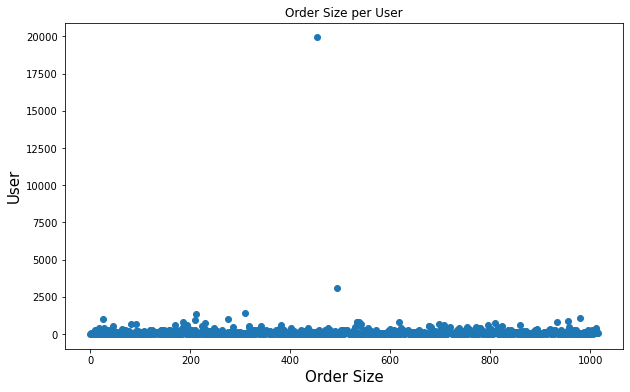

In [55]:
x_values = pd.Series(range(0, len(orders_new['revenue'])));

plt.figure(figsize=(10,6));
plt.xlabel('Order Size', fontsize=15)
plt.ylabel('User', fontsize=15)
plt.title('Order Size per User');
plt.scatter(x_values, orders_new['revenue']);

There are only 2 orders that seem to be far above the average amount. The big majority are clearly below 2500.

**Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly**

In [56]:
np.percentile(orders_new['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])

We were right; only 10% of order prices are over 280.8, and no more than 1% of orders are above 830.3.
Given the very few orders that stand out from the "crowd" in the scatter plot, we will consider an anomaly any order price that stands above 830.

#### A/B Testing

**RAW DATA**

**Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.**

In [57]:
#create variables
ordersbyusersA = orders_new[orders_new['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersbyusersA.columns = ['visitorid', 'orders']

ordersbyusersB = orders_new[orders_new['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersbyusersB.columns = ['visitorid', 'orders']

In [58]:
#create samples for each group, containing number of orders per user, 
#and assign 0 to those who didn't order anything

sampleA = pd.concat(
    [ordersbyusersA['orders'], 
    pd.Series(0, 
              index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersbyusersA['orders'])), 
              name='orders')],
    axis=0)

sampleB = pd.concat(
    [ordersbyusersB['orders'],
    pd.Series(0, 
              index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersbyusersB['orders'])), name='orders')],
    axis=0)

We now have 2 samples, each with the number of orders made by a certain user, including 0.
* Number of elements = number of users
* Sum of elements = number of orders

We can now calculate the conversion rate.

Hypotheses stand as follows:
* H0 = The conversion between group A and B is EQUAL
* H1 = The conversion between group A and B is DIFFERENT

We will also set the alpha level at 0.05

In [59]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.011
0.160


The p-value is lower than 0.05, so on raw data, we reject the null hypotheses, as the difference is statistically significant. 

The second value represents the relative conversion gain for group B vs group A, 16%. This is quite a statistical significant difference. 

We will need to compare it with filtered data (without outliers). But first, let's compare the average order sizes with raw data.

**Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.**

* H0 = The average order size between groups is EQUAL
* H1 = The average order size between groups is DIFFERENT

alpha value = 0.05

In [60]:
ordersizeA = orders_new[orders_new['group']=='A']['revenue']
ordersizeB = orders_new[orders_new['group']=='B']['revenue']

In [61]:
print("{0:.3f}".format(stats.mannwhitneyu(ordersizeA, ordersizeB, alternative='two-sided')[1]))
print("{0:.3f}".format(ordersizeB.mean()/ordersizeA.mean()-1))

0.862
0.278


The p-value is much greater than 0.05, so we failed to reject the null hypothesis and conclude that average order size differs between the groups.

On the other hand, the average order size for group B is much higer than it is for group A, 27.8%!

Before we head on to the filtered data, let's find out how many anomalous users we have.

In [62]:
manyorders = pd.concat([ordersbyusersA[ordersbyusersA['orders'] > 2]['visitorid'], ordersbyusersB[ordersbyusersB['orders'] > 2]['visitorid']], axis = 0)
bigsizeorders = orders_new[orders_new['revenue'] > 830.3]['visitorid']
abnormalUsers = pd.concat([manyorders, bigsizeorders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

25     148427295
33     249864742
58     611059232
209    887908475
211    888512513
Name: visitorid, dtype: int64
(16,)


We have 16 anomalous users. How did their actions affected the test results? Let's find out:

**FILTERED DATA**

**Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.**
* H0 = The conversion between groups with filtered data is EQUAL
* H1 = The conversion between groups with filtered data is DIFFERENT

alpha value = 0.05

In [63]:
sampleAFiltered = pd.concat([ordersbyusersA[np.logical_not(ordersbyusersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersbyusersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersbyusersB[np.logical_not(ordersbyusersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersbyusersB['orders'])),name='orders')],axis=0)

In [64]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.189


The results didn't change much compared to raw data.

The p-value is still lower than 0.05, so we also reject the null hypotheses with filtered data, as the difference is statistically significant.

The relative conversion gain for group B vs A is 18.9%, compared to 16% in raw data, almost the same.

Let's see if the average order size differs with filtered data.

**Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.**
* H0 = The average order size between the groups using filtered data is EQUAL
* H1 = The average order size between the groups using filtered data is DIFFERENT

In [65]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'],
    orders_new[np.logical_and(
        orders_new['group']=='B',
        np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')[1]))

print("{0:.3f}".format(
    orders_new[np.logical_and(orders_new['group']=='B',np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_new[np.logical_and(
        orders_new['group']=='A',
        np.logical_not(orders_new['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.822
-0.032




The p-value has slightly decreased compared to the one with raw data, but now the difference between the segments is 3%, instead of 27.8%! Anomalies clearly had an effect on the A/B test results.


Let's see the difference in conversion between groups:

In [66]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [67]:
cumulativeConversionA = cumulativeData[cumulativeData['group']=='A'][['date', 'conversion']]
cumulativeConversionB = cumulativeData[cumulativeData['group']=='B'][['date', 'conversion']]

In [68]:
mergedCumulativeConversion = cumulativeConversionA.merge(cumulativeConversionB, on='date', suffixes=['A', 'B'])
mergedCumulativeConversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


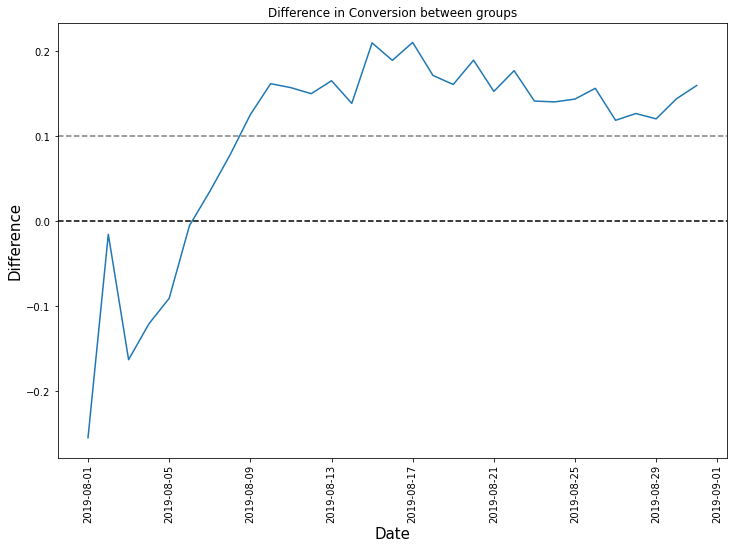

In [69]:
plt.figure(figsize=(12,8));
plt.plot(mergedCumulativeConversion['date'], (mergedCumulativeConversion['conversionB']/mergedCumulativeConversion['conversionA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Difference', fontsize=15)
plt.xticks(rotation='vertical');
plt.title('Difference in Conversion between groups');

The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: they still have a tendency to grow!

If we remember from a previous step, this is how the relative difference in average purchase size between the groups looks: very fluctuating! Therefore we cannot draw any definite conclusions from it

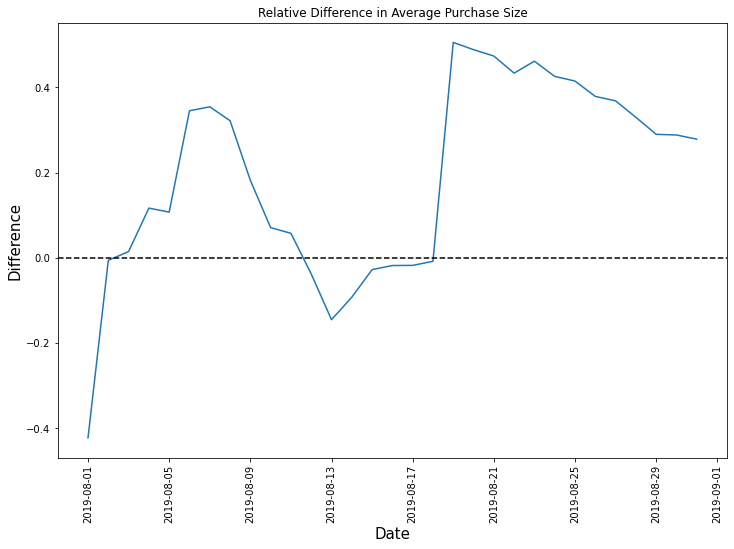

In [70]:
plt.figure(figsize=(12,8));
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Difference', fontsize=15)
plt.xticks(rotation='vertical');
plt.title('Relative Difference in Average Purchase Size');

**Conclusion**
* There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data
* Neither raw data nor filtered data showed a statistically significant difference between the groups in terms of average purchase size.
* As mentioned above, the difference in conversion between groups is still fluctuating, group B being on the lead.